In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from upsetplot import UpSet
from venn import venn

In [21]:
# Load the data
drug_era_atc = pd.read_csv("../../mappings/drug_era/drug_era_atc.tsv", sep="\t")
drug_era_chebi = pd.read_csv("../../mappings/drug_era/drug_era_chebi.tsv", sep="\t")
drug_era_drugbank = pd.read_csv(
    "../../mappings/drug_era/drug_era_drugbank.tsv", sep="\t"
)
drug_era_ingredients = pd.read_csv(
    "../../mappings/drug_era/drug_era_ingredients.tsv", sep="\t"
)

In [23]:
drug_era_atc.head()

,Unnamed: 0,drug_concept_id,concept_id,concept_name,domain_id,vocabulary_id,concept_class_id,standard_concept,concept_code,valid_start_date,valid_end_date,invalid_reason,_c0,_c1,_c7,_c11,_c12,_c13,_c14,_c16
0,0,1319998,1319998,acebutolol,Drug,RxNorm,Ingredient,S,149,1970-01-01,2099-12-31,NaN,149,ENG,5478462,ATC,IN,C07AB04,acebutolol,N
1,1,19024063,19024063,acenocoumarol,Drug,RxNorm,Ingredient,S,154,1970-01-01,2099-12-31,NaN,154,ENG,5478470,ATC,IN,B01AA07,acenocoumarol,N
2,2,929435,929435,acetazolamide,Drug,RxNorm,Ingredient,S,167,1970-01-01,2099-12-31,NaN,167,ENG,5478475,ATC,IN,S01EC01,acetazolamide,N
3,3,929549,929549,acetic acid,Drug,RxNorm,Ingredient,S,168,1970-01-01,2099-12-31,NaN,168,ENG,5478476,ATC,IN,G01AD02,acetic acid,N
4,4,929549,929549,acetic acid,Drug,RxNorm,Ingredient,S,168,1970-01-01,2099-12-31,NaN,168,ENG,5478477,ATC,IN,S02AA10,acetic acid,N


In [24]:
drug_era_chebi.head()

,Unnamed: 0,drug_concept_id,CONCEPT_ID,CONCEPT_CODE,CONCEPT_NAME,ONTOLOGY_LOGIC,ONTOLOGY_URI,ONTOLOGY_LABEL,MAPPING_CATEGORY,MAPPING_EVIDENCE
0,0,523283,523283,763096.0,"poliovirus vaccine inactivated, type 1 (Mahoney)",NaN,CHEBI_60816,immunogen,Manual One-to-One Concept,Source:DrugBank_DB10795 | Hand Mapping | Exper...
1,1,529303,529303,798304.0,"diphtheria toxoid vaccine, inactivated",NaN,CHEBI_60816,immunogen,Manual One-to-One Concept,Hand Mapping
2,2,529411,529411,798306.0,"tetanus toxoid vaccine, inactivated",NaN,CHEBI_60816,immunogen,Manual One-to-One Concept,Source:DrugBank_DB10583 | Hand Mapping | Exper...
3,3,532881,532881,807219.0,"Typhoid Vi Polysaccharide Vaccine, S typhi Ty2...",AND,CHEBI_60816 | CHEBI_65212,immunogen | polysaccharide derivative,Manual One-to-Many Concept,Source:DrugBank_DB10803 | Hand Mapping
4,4,702865,702865,6760.0,Meprobamate,NaN,CHEBI_6761,meprobamate,Automatic One-to-One Concept,OBO_LABEL-OMOP_ANCESTOR_LABEL:meprobamate | OB...


In [25]:
# change the column name from "CONCEPT_NAME" to "concept_name"
drug_era_chebi = drug_era_chebi.rename(columns={"CONCEPT_NAME": "concept_name"})

In [26]:
drug_era_drugbank.head()

,Unnamed: 0,drug_concept_id,concept_id,concept_name,domain_id,vocabulary_id,concept_class_id,standard_concept,concept_code,valid_start_date,...,invalid_reason,_c0,_c1,_c7,_c9,_c11,_c12,_c13,_c14,_c16
0,0,1319998,1319998,acebutolol,Drug,RxNorm,Ingredient,S,149,1970-01-01,...,NaN,149,ENG,8575333,DB01193,DRUGBANK,IN,DB01193,Acebutolol,N
1,1,19024063,19024063,acenocoumarol,Drug,RxNorm,Ingredient,S,154,1970-01-01,...,NaN,154,ENG,8368187,DB01418,DRUGBANK,IN,DB01418,Acenocoumarol,N
2,2,929435,929435,acetazolamide,Drug,RxNorm,Ingredient,S,167,1970-01-01,...,NaN,167,ENG,8650243,DB00819,DRUGBANK,IN,DB00819,Acetazolamide,N
3,3,929549,929549,acetic acid,Drug,RxNorm,Ingredient,S,168,1970-01-01,...,NaN,168,ENG,8393346,DB03166,DRUGBANK,IN,DB03166,Acetic acid,N
4,4,1701928,1701928,activated charcoal,Drug,RxNorm,Ingredient,S,272,1970-01-01,...,NaN,272,ENG,8337611,DB09278,DRUGBANK,IN,DB09278,Activated charcoal,N


In [27]:
drug_era_ingredients.head()

,Unnamed: 0,drug_concept_id,concept_id,concept_name,domain_id,vocabulary_id,concept_class_id,standard_concept,concept_code,valid_start_date,...,_c1,_c7,_c8,_c9,_c11,_c12,_c13,_c14,_c16,_c17
0,0,1319998,1319998,acebutolol,Drug,RxNorm,Ingredient,S,149,1970-01-01,...,ENG,12253229,12253229,149,RXNORM,IN,149,acebutolol,N,4096.0
1,1,19024063,19024063,acenocoumarol,Drug,RxNorm,Ingredient,S,154,1970-01-01,...,ENG,12254380,12254380,154,RXNORM,IN,154,acenocoumarol,N,NaN
2,2,929435,929435,acetazolamide,Drug,RxNorm,Ingredient,S,167,1970-01-01,...,ENG,12253835,12253835,167,RXNORM,IN,167,acetazolamide,N,4096.0
3,3,929549,929549,acetic acid,Drug,RxNorm,Ingredient,S,168,1970-01-01,...,ENG,12250948,12250948,168,RXNORM,IN,168,acetic acid,N,4096.0
4,4,1701928,1701928,activated charcoal,Drug,RxNorm,Ingredient,S,272,1970-01-01,...,ENG,12251527,12251527,272,RXNORM,IN,272,activated charcoal,N,4096.0


In [28]:
# Create sets of unique drugs from each dataset based on 'drug_concept_id' and 'concept_name'
ingredients_set = set(drug_era_ingredients["drug_concept_id"])
atc_set = set(drug_era_atc["drug_concept_id"])
drugbank_set = set(drug_era_drugbank["drug_concept_id"])
chebi_set = set(drug_era_chebi["drug_concept_id"])

In [29]:
# See how many unique drug_concept_ids there are
(
    len(drug_era_atc["drug_concept_id"].unique()),
    len(drug_era_chebi["drug_concept_id"].unique()),
    len(drug_era_drugbank["drug_concept_id"].unique()),
    len(drug_era_ingredients["drug_concept_id"].unique()),
)

(1141, 1562, 1271, 1568)

In [30]:
(
    len(drug_era_atc),
    len(drug_era_chebi),
    len(drug_era_drugbank),
    len(drug_era_ingredients),
)

(1617, 1562, 1280, 1568)

In [31]:
len(atc_set), len(chebi_set), len(drugbank_set), len(ingredients_set)

(1141, 1562, 1271, 1568)

In [32]:
# Create a union of all drug_concept_id values
all_drugs = ingredients_set | atc_set | drugbank_set | chebi_set
all_drugs_list = list(all_drugs)

In [33]:
# Create a DataFrame with drug_concept_id as the index and boolean columns for each dataset
upset_data = pd.DataFrame(
    {
        "Ingredients": [drug in ingredients_set for drug in all_drugs_list],
        "ATC": [drug in atc_set for drug in all_drugs_list],
        "DrugBank": [drug in drugbank_set for drug in all_drugs_list],
        "ChEBI": [drug in chebi_set for drug in all_drugs_list],
    },
    index=all_drugs_list,
)

In [35]:
upset_data = upset_data.groupby(["Ingredients", "ATC", "DrugBank", "ChEBI"]).size()

In [36]:
upset_data

Ingredients  ATC    DrugBank  ChEBI
False        False  False     True        4
True         False  False     False       7
                              True      216
                    True      True      204
             True   False     True       74
                    True      False       3
                              True     1064
dtype: int64

In [37]:
upset_data.reset_index()

,Ingredients,ATC,DrugBank,ChEBI,0
0,False,False,False,True,4
1,True,False,False,False,7
2,True,False,False,True,216
3,True,False,True,True,204
4,True,True,False,True,74
5,True,True,True,False,3
6,True,True,True,True,1064


/Users/punny/Repos/Project_PerMed/.venv/lib/python3.12/site-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)
/Users/punny/Repos/Project_PerMed/.venv/lib/python3.12/site-packages/upsetplot/plotting.py:796: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we 

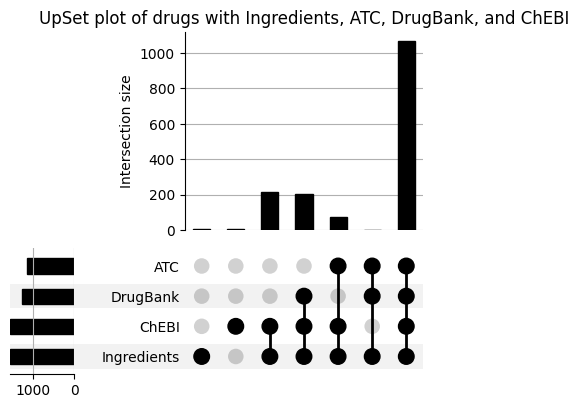

In [96]:
upset = UpSet(upset_data)
upset.plot()
plt.title("UpSet plot of drugs with Ingredients, ATC, DrugBank, and ChEBI")
plt.show()

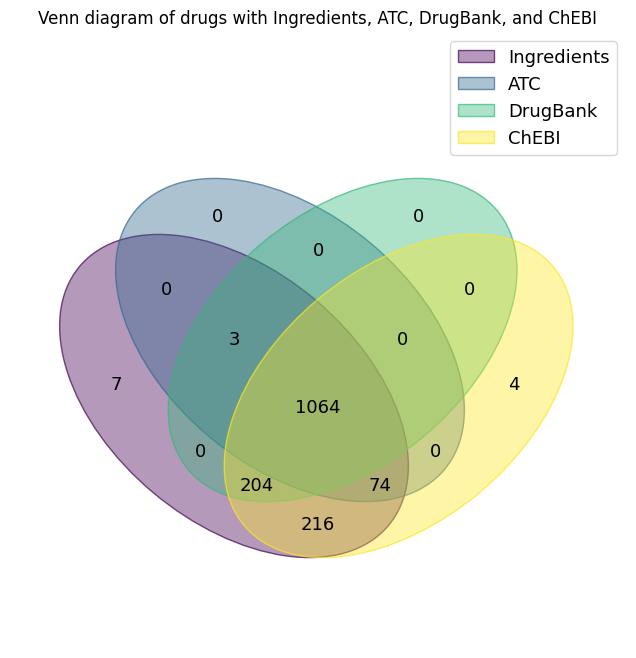

In [99]:
# Combine these into a dictionary for the venn function
sets = {
    "Ingredients": ingredients_set,
    "ATC": atc_set,
    "DrugBank": drugbank_set,
    "ChEBI": chebi_set,
}

# Plot the venn diagram
venn(sets)
plt.title("Venn diagram of drugs with Ingredients, ATC, DrugBank, and ChEBI")
plt.show()

In [38]:
# see which drugs lacks atc, drugbank, chebi, ingredients
lacks_atc = all_drugs - atc_set
lacks_drugbank = all_drugs - drugbank_set
lacks_chebi = all_drugs - chebi_set
lacks_ingredients = all_drugs - ingredients_set


# create a df with all the drug code and names
all_drugs_df = pd.concat(
    [
        drug_era_ingredients[["drug_concept_id", "concept_name"]],
        drug_era_atc[["drug_concept_id", "concept_name"]],
        drug_era_drugbank[["drug_concept_id", "concept_name"]],
        drug_era_chebi[["drug_concept_id", "concept_name"]],
    ]
)

# get the names of the drugs that lack atc, drugbank, chebi, ingredients. keep only one row per drug
lacks_atc_df = all_drugs_df[
    all_drugs_df["drug_concept_id"].isin(lacks_atc)
].drop_duplicates(subset="drug_concept_id")
lacks_drugbank_df = all_drugs_df[
    all_drugs_df["drug_concept_id"].isin(lacks_drugbank)
].drop_duplicates(subset="drug_concept_id")
lacks_chebi_df = all_drugs_df[
    all_drugs_df["drug_concept_id"].isin(lacks_chebi)
].drop_duplicates(subset="drug_concept_id")
lacks_ingredients_df = all_drugs_df[
    all_drugs_df["drug_concept_id"].isin(lacks_ingredients)
].drop_duplicates(subset="drug_concept_id")

In [45]:
lacks_atc_df

,drug_concept_id,concept_name
26,938205,camphor
33,1195334,choline
38,1000995,coal tar
39,19101604,cod liver oil
44,1319156,dextran 70
...,...,...
1567,35200165,fish oil (containing omega-3 acids)
692,992409,Senna Leaves
1166,19052638,Cobalamins
1498,19058973,Calcium phosphate dibasic


In [40]:
lacks_chebi_df

,drug_concept_id,concept_name
305,1146220,Lactobacillus paracasei
626,1511349,Senna pod
627,789800,sodium lauryl phosphate
1251,1510417,cannabidiol
1252,1510492,ursadiol
1253,1356018,prucalopride
1254,1366390,Bifidobacterium breve
1255,1366603,octenidine
1256,37498625,"hepatitis A virus strain CR 326F antigen, inac..."
1567,35200165,fish oil (containing omega-3 acids)


In [41]:
lacks_drugbank_df

,drug_concept_id,concept_name
8,1169352,alpha 1-antitrypsin
37,19099181,clopamide
41,19072083,cyclofenil
44,1319156,dextran 70
64,1563600,chorionic gonadotropin
...,...,...
1567,35200165,fish oil (containing omega-3 acids)
692,992409,Senna Leaves
1166,19052638,Cobalamins
1498,19058973,Calcium phosphate dibasic


In [42]:
lacks_ingredients_df

,drug_concept_id,concept_name
692,992409,Senna Leaves
1166,19052638,Cobalamins
1498,19058973,Calcium phosphate dibasic
1539,42899447,"Insulin, Pork"


In [15]:
# see what drugs only lack drugbank
lacks_only_drugbank = (ingredients_set & atc_set & chebi_set) - drugbank_set
print(len(lacks_only_drugbank))

74


In [19]:
lacks_only_drugbank_df = all_drugs_df[
    all_drugs_df["drug_concept_id"].isin(lacks_only_drugbank)
].drop_duplicates(subset="drug_concept_id")
lacks_only_drugbank_df

,drug_concept_id,concept_name
8,1169352,alpha 1-antitrypsin
37,19099181,clopamide
41,19072083,cyclofenil
64,1563600,chorionic gonadotropin
75,19124477,lithium
...,...,...
1414,1000979,guar gum
1424,19023819,phenothrin
1433,939871,sodium phosphate
1462,900017,cascara sagrada


In [20]:
lacks_only_drugbank_df.to_csv("./lacks_only_drugbank.csv", index=False)

In [46]:
lacks_drugbank_df.to_csv("./lacks_drugbank.csv", index=False)
lacks_atc_df.to_csv("./lacks_atc.csv", index=False)
lacks_chebi_df.to_csv("./lacks_chebi.csv", index=False)
lacks_ingredients_df.to_csv("./lacks_ingredients.csv", index=False)